# Testing the subcubes of the 30 Dor fields

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube

In [2]:
sns.set_context("talk")

Load the subcube containing Hα

In [3]:
cubeC = Cube("../big-data/lmc-30dor-C-subcube-62-71.fits")

Plot the average spectrum of the entire field, together with the expected wavelengths of the Raman scattered O I and Si II lines.  I am assuming a systemic velocity of +265 km/s, which comes from the Hα and [N II] lines, although it might be slightly different for neutral lines.

[(700.0, 900.0)]

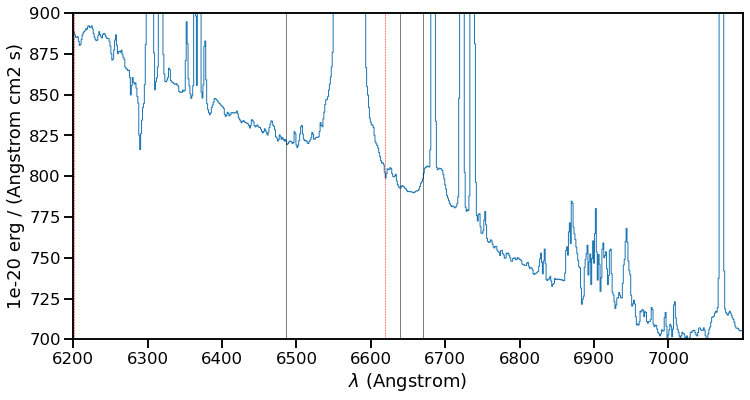

In [12]:
Vsys = 265.0
light_speed = 3e5

fig, ax = plt.subplots(figsize=(12, 6))
cubeC.mean(axis=(1, 2)).plot()
for wav in 6633.35, 6663.75, 6480.8:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="k", linewidth=0.5)
for wav in (
    6196.0,
    6613.5,
):
    ax.axvline(
        wav * (1.0 + Vsys / light_speed), color="r", linewidth=0.5, linestyle="dashed"
    )
ax.set(
    ylim=[700, 900],
)

So, we can maybe just about see the Raman wings but they are quite weak in the average spectrum.  There are possible indications of the Raman absorption lines, but there is a lot of other stuff that gets in the way.  There is a very pronounced absorption at a rest wavelength of 6613.5 Å, which is probably the 6614 DIB feature. It is usually accompanied by another feature at 6196 Å, but that just misses this spectral window.

- [ ] *We need to check the correlation of its EW with C(Hβ) to see if it is really a DIB*

Alternatively, it **could** be a Raman-scattered feature.  We need to work out what its UV wavelength would be.

In [15]:
# convert to vacuum
wav2 = 6613.5 * 6635.17 / 6633.338
# convert from Hα frame to Lyβ frame
wav1 = 1 / (1 / wav2 + 1 / 1025.72220 - 1 / 6564.553)
wav1

1026.9537767742042

I have looked at the [AtLL](https://www.pa.uky.edu/~peter/newpage/index.html) and it turns out there is an S I line at 1026.95 Å, and also a Be II line:

```
-LAB-WAVL-ANG-VAC-|-SPC--|TT|----------CONFIGURATION----------|-TERM--|-J_i-J_k-|--A_ki--|-TPF-|--LEVEL-ENERGY--EV--|-REF---|
   1026.95          S I]  E1          3s2.3p4-3s2.3p3.(2Po).9d  1D-3Po   2 - 1                  1.145441 - 13.218400 ASD
   1026.95          S I]  E1          3s2.3p4-3s2.3p3.(2Po).9d  1D-3Po   2 - 2                  1.145441 - 13.218400 ASD
   1026.9586        Be II E1           1s2.2p-1s2.5d           2Po-2D  3/2 - 5/2 1.76e+08     3 3.959477 - 16.032426 010
   1026.9599        Be II E1           1s2.2p-1s2.5d           2Po-2D  3/2 - 3/2 2.94e+07     3 3.959477 - 16.032411 010
```

Both look very unlikely candidates. Be II because of negligible abundance and lower level is at 4 eV.  S I because S$^+$ should be dominant ionization stage, but maybe there could be enough column of S$^0$ in the PDR.  But lower level is at 1.14 eV, so would require very high densities (how high?) and temperature of at least 5000 K to populate.  And there is no $A$ value given, but it is likely to be small since it is semi-forbidden.


The 6664 feature is broad emission wings on the He I 6678 line. Is this from WR stars?

## Quick and dirty extraction of some lines

In [16]:
hacont_blue = cubeC.select_lambda(6490, 6500).mean(axis=0)

In [17]:
hacont_red = cubeC.select_lambda(6640, 6650).mean(axis=0)

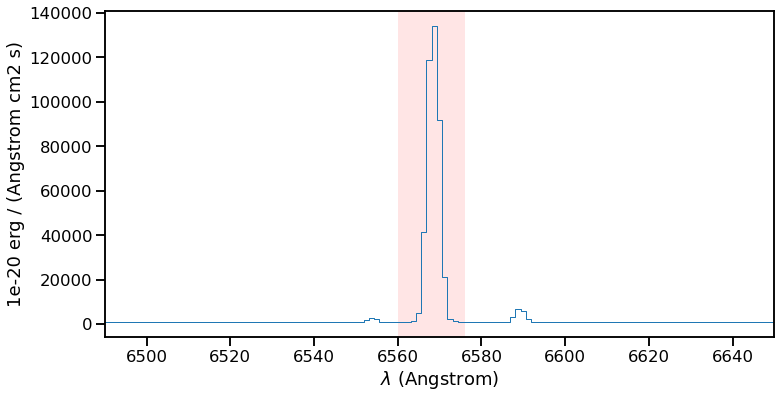

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeC.select_lambda(6490, 6650).mean(axis=(1, 2)).plot()
ax.axvspan(6560, 6576, linewidth=0, color="r", alpha=0.1)

In [53]:
# hamapC = (cubeC.select_lambda(6560, 6576) - 0.5*(hacont_blue + hacont_red)).sum(axis=0)
hacont = 0.5 * (hacont_blue + hacont_red)
hamapC = cubeC.select_lambda(6567, 6569).sum(axis=0)

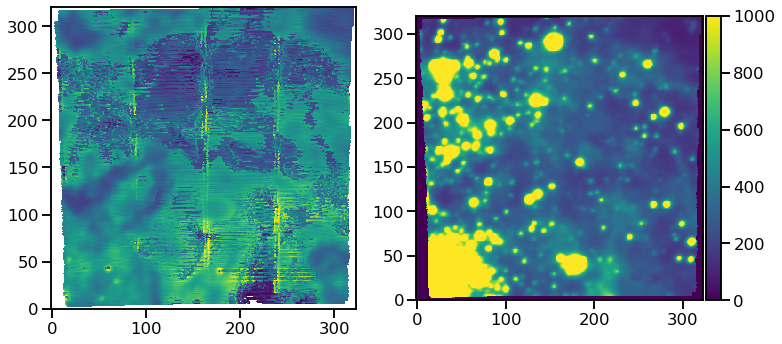

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
hamapC.plot(ax=axes[0], vmin=0, vmax=6e5)
hacont.plot(ax=axes[1], colorbar="v", vmin=0, vmax=1e3)

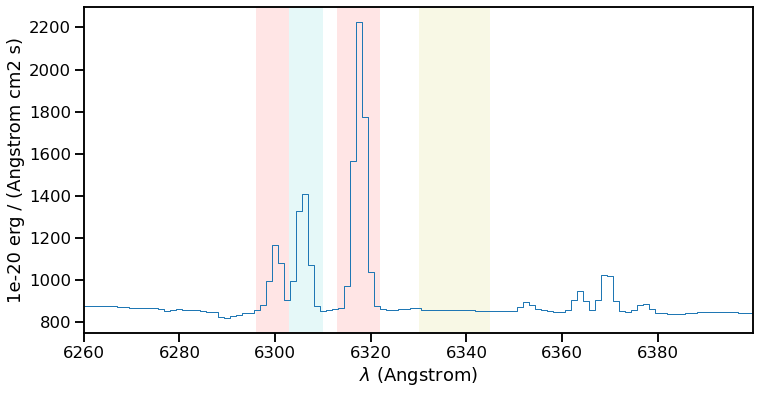

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeC.select_lambda(6260, 6400).mean(axis=(1, 2)).plot()
ax.axvspan(6296, 6303, linewidth=0, color="r", alpha=0.1)
ax.axvspan(6303, 6310, linewidth=0, color="c", alpha=0.1)
ax.axvspan(6313, 6322, linewidth=0, color="r", alpha=0.1)
ax.axvspan(6330, 6345, linewidth=0, color="y", alpha=0.1)

In [46]:
cont6340 = cubeC.select_lambda(6330, 6345).mean(axis=0)
oi6300map = (cubeC.select_lambda(6303, 6310) - cont6340).sum(axis=0)

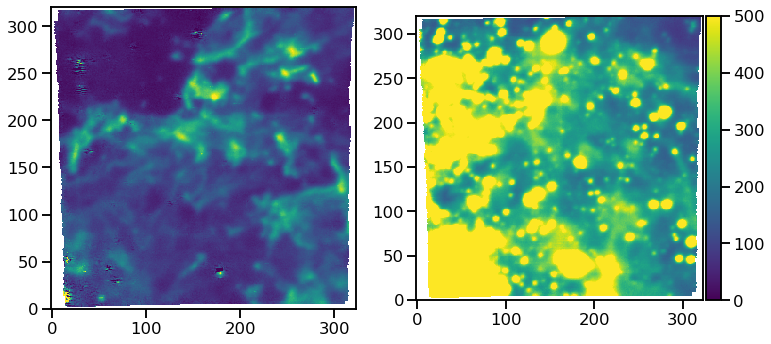

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
oi6300map.plot(ax=axes[0], vmin=0, vmax=6e3)
cont6340.plot(ax=axes[1], colorbar="v", vmin=0, vmax=5e2)

In [60]:
xx6293map = (cubeC.select_lambda(6296, 6303) - cont6340).sum(axis=0)
siii6312map = (cubeC.select_lambda(6313, 6322) - cont6340).sum(axis=0)

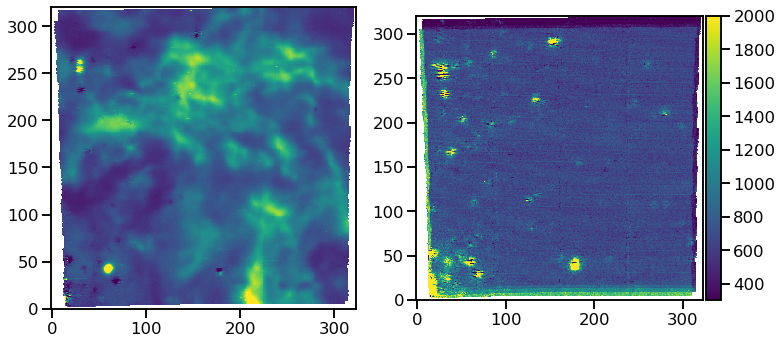

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
siii6312map.plot(ax=axes[0], vmin=0, vmax=1e4)
xx6293map.plot(ax=axes[1], colorbar="v", vmin=300, vmax=2000)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


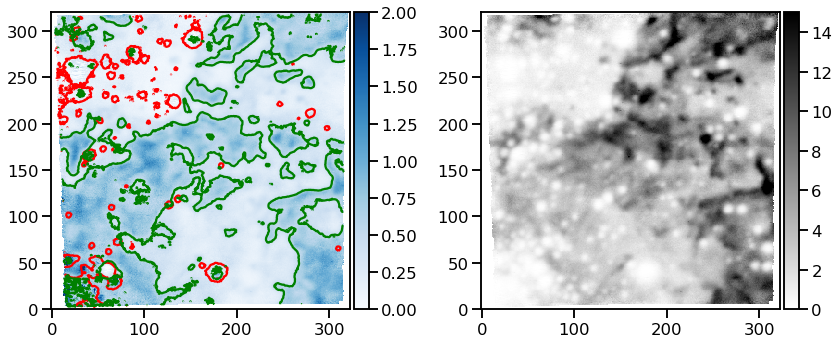

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
(oi6300map / siii6312map).plot(ax=axes[0], vmin=0, vmax=2.0, cmap="Blues", colorbar="v")
(oi6300map / cont6340).plot(ax=axes[1], vmin=0, vmax=15.0, cmap="gray_r", colorbar="v")
axes[0].contour((oi6300map / cont6340).data, levels=[0.5], colors="r")
axes[0].contour((oi6300map / siii6312map).data, levels=[0.5], colors="g")

fig.tight_layout()

In [80]:
m = ((oi6300map / cont6340).data > 0.5) & ((oi6300map / siii6312map).data > 0.5)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


In [81]:
cubeCC = cubeC.copy()
cubeCC.mask = cubeCC.mask | (~m[None, :, :])

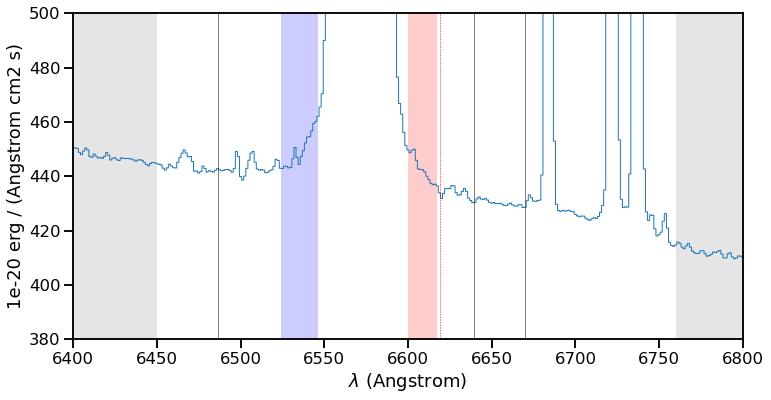

In [125]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeCC.mean(axis=(1, 2)).plot()
for wav in 6633.35, 6663.75, 6480.8:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="k", linewidth=0.5)
for wav in (
    6196.0,
    6613.5,
):
    ax.axvline(
        wav * (1.0 + Vsys / light_speed), color="r", linewidth=0.5, linestyle="dashed"
    )

dopfac = 1.0 + Vsys / light_speed
ax.axvspan(6594.2 * dopfac, 6611.2 * dopfac, linewidth=0, color="r", alpha=0.2)
ax.axvspan(6518.55 * dopfac, 6540.65 * dopfac, linewidth=0, color="b", alpha=0.2)


ax.axvspan(6400, 6450, linewidth=0, color="k", alpha=0.1)
ax.axvspan(6760, 6800, linewidth=0, color="k", alpha=0.1)


ax.set(
    xlim=[6400, 6800],
    ylim=[380, 500],
)

Select the inner Raman bands on the red and blue sides: B033 and R040.

In [126]:
cont6400 = cubeC.select_lambda(6400, 6450).mean(axis=0)
cont6800 = cubeC.select_lambda(6760, 6800).mean(axis=0)
cont6600 = 0.5 * (cont6400 + cont6800)
cont6500 = 0.5 * (cont6400 + cont6600)
raman_R040 = (cubeC.select_lambda(6594.2 * dopfac, 6611.2 * dopfac) - cont6600).mean(
    axis=0
)
raman_B033 = (cubeC.select_lambda(6518.55 * dopfac, 6540.65 * dopfac) - cont6500).mean(
    axis=0
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


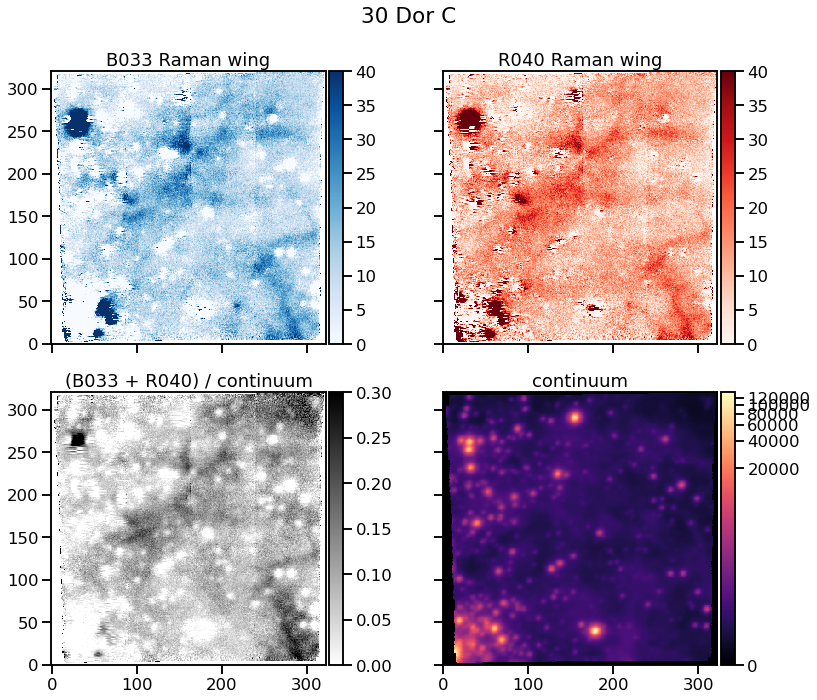

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
raman_B033.plot(ax=axes[0, 0], vmin=0, vmax=40, cmap="Blues", colorbar="v")
raman_R040.plot(ax=axes[0, 1], colorbar="v", vmin=0, vmax=40, cmap="Reds")
((raman_R040 + raman_B033) / cont6600).plot(
    ax=axes[1, 0], vmin=0, vmax=0.3, colorbar="v", cmap="gray_r"
)
cont6600.plot(ax=axes[1, 1], scale="log", colorbar="v", cmap="magma")
axes[0, 0].set_title("B033 Raman wing")
axes[0, 1].set_title("R040 Raman wing")
axes[1, 0].set_title("(B033 + R040) / continuum")
axes[1, 1].set_title("continuum")
fig.suptitle("30 Dor C")
fig.tight_layout()
fig.savefig("../figs/lmc-30dor-C-raman-blue-red.pdf")

The blue and red Raman wings look remarkably similar.  They trace different material than [O I], more distant from the star cluster.

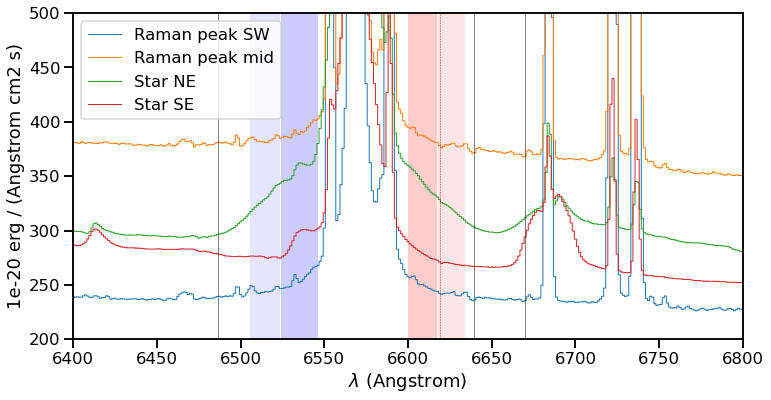

In [152]:
fig, ax = plt.subplots(figsize=(12, 6))
cubeC[:, :40, 250:].mean(axis=(1, 2)).plot(label="Raman peak SW")
cubeC[:, 130:180, 80:120].mean(axis=(1, 2)).plot(label="Raman peak mid")
(0.035 * cubeC[:, 260:275, 20:40]).mean(axis=(1, 2)).plot(label="Star NE")
(0.035 * cubeC[:, 20:50, 60:75]).mean(axis=(1, 2)).plot(label="Star SE")

for wav in 6633.35, 6663.75, 6480.8:
    ax.axvline(wav * (1.0 + Vsys / light_speed), color="k", linewidth=0.5)
for wav in (
    6196.0,
    6613.5,
):
    ax.axvline(
        wav * (1.0 + Vsys / light_speed), color="r", linewidth=0.5, linestyle="dashed"
    )

ax.axvspan(6594.2 * dopfac, 6611.2 * dopfac, linewidth=0, color="r", alpha=0.2)
ax.axvspan(6518.55 * dopfac, 6540.65 * dopfac, linewidth=0, color="b", alpha=0.2)

ax.axvspan(6612.05 * dopfac, 6628.20 * dopfac, linewidth=0, color="r", alpha=0.1)
ax.axvspan(6499.85 * dopfac, 6517.70 * dopfac, linewidth=0, color="b", alpha=0.1)


ax.legend()

ax.set(
    xlim=[6400, 6800],
    ylim=[200, 500],
)
fig.savefig("../figs/lmc-30dor-C-raman-clump-spectra.pdf")

This is selecting the 3 regions that have a large Raman/continuum ratio.

The middle two are the compact source at the top-left and the bunch of stars at bottom left.  They are clearly Wolf-Rayet stars and do not show Raman scattering at all.  The shape of the wings is wrong, and the He I line has wings too.

But the top and bottom one are clear Raman profiles. The O I 6633 absorption looks to be slightly blue-shifted from the systemic velocity.  Why would that be?

Both the B033 and R040 bands are relativly free of line contamination, although there is a small contribution from the [N II] line in B033.

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


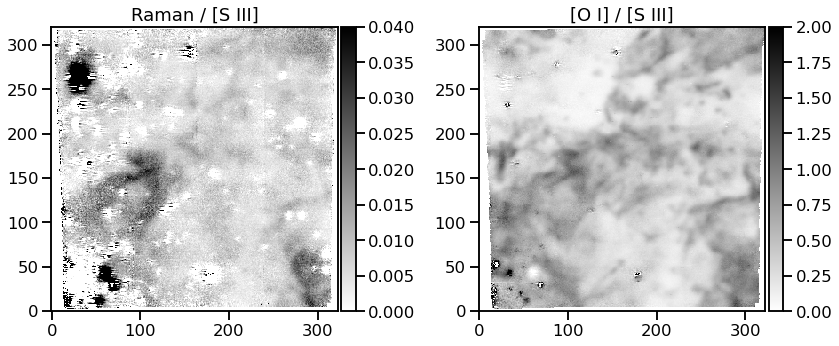

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
((raman_R040 + raman_B033) / siii6312map).plot(
    ax=axes[0],
    vmin=0,
    vmax=0.04,
    cmap="gray_r",
    colorbar="v",
)
(oi6300map / siii6312map).plot(
    ax=axes[1],
    vmin=0,
    vmax=2.0,
    cmap="gray_r",
    colorbar="v",
)
axes[0].set_title("Raman / [S III]")
axes[1].set_title("[O I] / [S III]")


fig.tight_layout()

Save FITS files of what we have done. Use label `ROUGH` because we should really redo this with a proper continuum subtraction.

In [153]:
for im, label in [
    (raman_R040, "ha-raman-R040"),
    (raman_B033, "ha-raman-B033"),
    (oi6300map, "oi-6300"),
    (siii6312map, "siii-6312"),
]:
    im.write(f"../data/lmc-30dor-C-ROUGH-{label}.fits", savemask="nan")

### Summary of initial analysis of Raman wings in 30 Dor field C

+ There is Raman wing emission from the entire map, but it is generally weak:(R040+B033)/continuum < 0.1
+ There are some clumps and filaments of intense Raman wing emission: (R040+B033)/continuum > 0.2
+ These are all low ionization regions where [O I] / [S III] ~ 1
+ But they tend to be slightly displaced away from the cluster from the [O I] emission
+ And not all regions with high [O I] / [S III] show high Raman wing emission
+ Wolf Rayet stars can be "Raman imposters" due to therir broad Hα lines.  But these also have broad He I lines, which would allow them to be easily masked out
+ There is an absorption feature at 6614 Å, which is probably DIB absorption.  It is strong in the integrated spectrum of the field, but much weaker in the areas of intense Raman wings.
+ [ ] *There is something very strange about the Hα map, which has lots of horrible artifacts*  The other lines (e.g., [O I], [S III]) do not show this problem.

## Fit and remove continuum properly

The above analysis is fine as far as it goes (except for the Hα core, which looks weird).

But really we should remove the continuum pixel-by-pixel.  Then we can maybe get maps of the outer Raman bands as well as the inner ones.


Start off by defining a diverse set of spatial regions.  Include some dominated by nebula of low and high ionization, and some dominated by stars.  Also include some pathological case such as the WR stars.


In [190]:
import regions
import sys
sys.path.append("../lib")
import moments
import extract

In [159]:
boxes = {
    "Raman SW": regions.BoundingBox(
        iymin=10,
        iymax=40,
        ixmin=250,
        ixmax=310,
    ),
    "Raman Compact": regions.BoundingBox(
        iymin=165,
        iymax=180,
        ixmin=80,
        ixmax=102,
    ),
    "Raman Mid": regions.BoundingBox(
        iymin=120,
        iymax=162,
        ixmin=85,
        ixmax=143,
    ),
    "Raman Tri": regions.BoundingBox(
        iymin=210,
        iymax=250,
        ixmin=145,
        ixmax=195,
    ),
    "[O I] E": regions.BoundingBox(
        iymin=140,
        iymax=190,
        ixmin=20,
        ixmax=35,
    ),
    "[S III] SW": regions.BoundingBox(
        iymin=6,
        iymax=38,
        ixmin=203,
        ixmax=230,
    ),
    "[S III] NE": regions.BoundingBox(
        iymin=220,
        iymax=260,
        ixmin=100,
        ixmax=137,
    ),
    "Star NE": regions.BoundingBox(
        iymin=250,
        iymax=275,
        ixmin=20,
        ixmax=40,
    ),
    "Star SE": regions.BoundingBox(
        iymin=55,
        iymax=69,
        ixmin=20,
        ixmax=40,
    ),
}

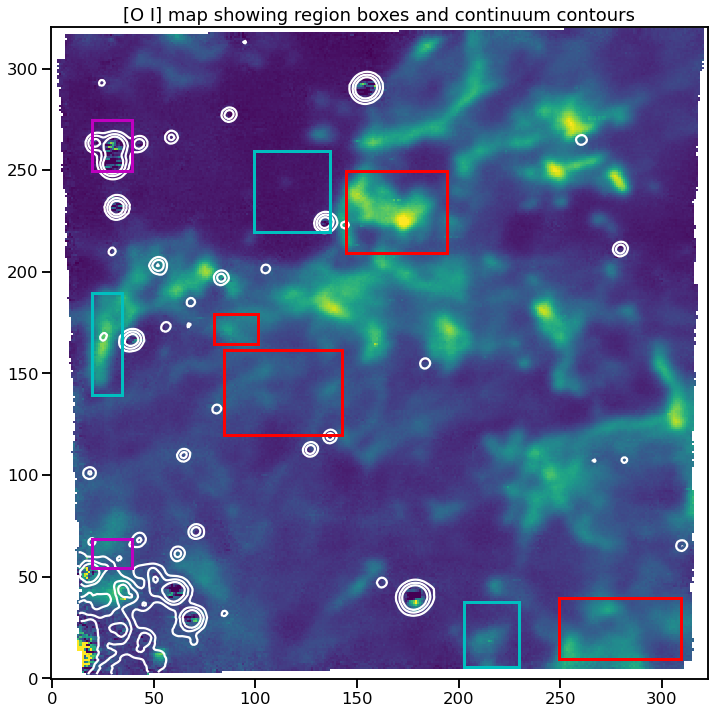

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
oi6300map.plot(vmin=0, vmax=6e3, use_wcs=False)
ax.contour(
    cont6400.data, 
    levels=[2500, 5000, 10000], 
    colors="w"
)
for key, box in boxes.items():
    color = "c"
    if "Raman" in key: 
        color = "r"
    if "Star" in key:
        color = "m"
    box.plot(
        edgecolor=color, 
        lw=3, 
        zorder=100,
    )

ax.set_title(
    "[O I] map showing region boxes and continuum contours"
);

Plot all the spectra on a log scale

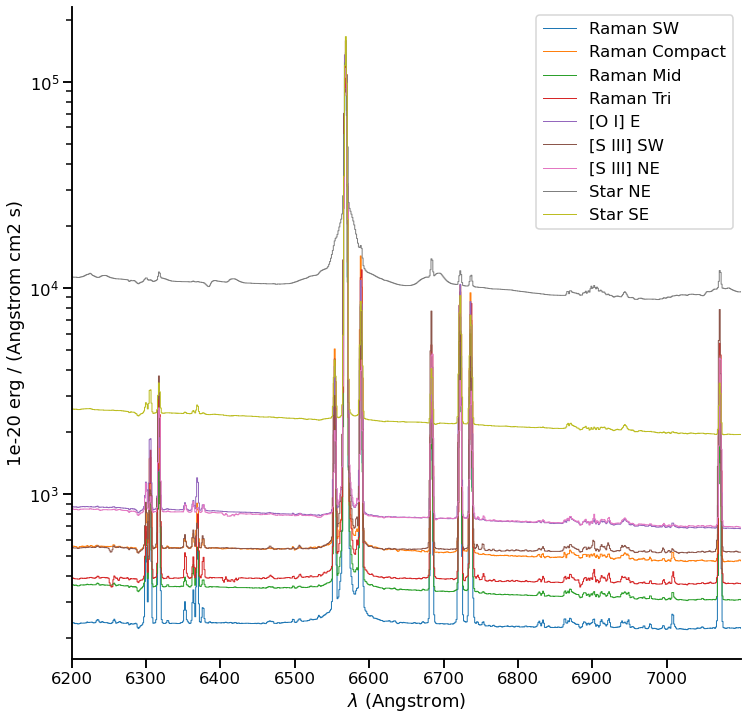

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for key, box in boxes.items():
    yslice, xslice = box.slices
    spec = cubeC[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot(label=key)
ax.legend()
ax.set(
    yscale="log",
)
sns.despine();

Choose some wavelength ranges for fitting the continuum:

In [202]:
wavranges = [
    (6200, 6218), (6270, 6286), (6333, 6346), (6390, 6400), (6432, 6455),
    (6840, 6856), (6960, 6970), (6980, 6990),
]

Normalize to continuum and plot again, together with the continuum ranges.

The good thing is that there is very little curvature to the continuum in this range, so we can use a low order polnomial. 

I am trying to find a set of continuum ranges that will work for the Wolf-Rayet star also. 

**Note that the following does a pixel-by-pixel continuum fit for each box.  This runs in about 30 sec on my machine**

extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 0
extract.fit_continuum: row 10


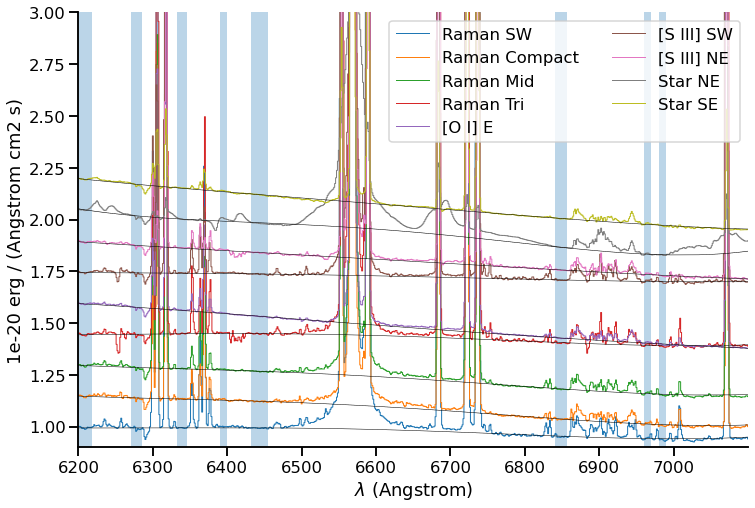

In [203]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
offset = 0.0
for key, box in boxes.items():
    yslice, xslice = box.slices
    subcube = cubeC[:, yslice, xslice]
    contcube = extract.fit_continuum(
        subcube, wav_ranges=wavranges, deg=4, median=False,
    )
    spec = subcube.mean(axis=(1, 2))
    cspec = contcube.mean(axis=(1, 2))
    cspec /= spec.data[0]
    cspec += offset
    spec /= spec.data[0]
    spec += offset
    spec.plot(label=key)
    cspec.plot(label="_nolabel_", c="k", linewidth=0.5)
    offset += 0.15

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=2)
ax.set(
    yscale="linear",
    ylim=[0.9, 3.0],
)
sns.despine();

This works remarkably well with a 4th order polynomial.  I experimented with leaving out the `(6432, 6455)` range but that significantly worsened the fit. 

It makes me think that the far blue wings that I seemed to find in Orion are artifacts of the continuum fitting.

Now fit the entire cube at once.  **This takes about 1 minute on my laptop**

In [204]:
contcubeC = extract.fit_continuum(
    cubeC, wav_ranges=wavranges, deg=4, median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:346: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:414: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


In [205]:
prefix = "../big-data/lmc-30dor-C-subcube-62-71"
csubcube = (cubeC - contcubeC)
cdivcube = (cubeC / contcubeC)
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
    )
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
    )
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
